# Primer on Practical Probability- Nassim Option Pricing Model
This file is from Prof. Raphael Douady's course Primer. I hope it may increase your understanding of the concepts taught in the course. <br>
It demonstrates the use of Nassim Option Pricing Model as taught in the excel file (Nassim Option Formula) taught by professor,feel free to reach use the parameters for play and better understanding of what happens.<br> 
His excel files are amazing this is in no way replacement, it is just a GUI to get the intuition

#### Functions to Load

In [ ]:
pip install pandas numpy matplotlib ipywidgets openpyxl

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
from ipywidgets import interactive                     
from ipywidgets import widgets                            
from ipywidgets import Layout
from ipywidgets import Label
from ipywidgets import VBox, HBox
%matplotlib inline

In [59]:
data = pd.read_excel('Option_data.xlsx')
df_out_f = data[((data.Strike>=data.future_val_implied[0])&(data.Option_Type=='CE'))|((data.Strike<=data.future_val_implied[0])&(data.Option_Type=='PE'))]

#### Initial Look at Data

In [4]:
data

,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility,Option_Type,future_val_implied,Current_date,Expiry_date
0,SPY210430C00200000,2021-03-19 12:43PM EDT,200.0,191.00,210.51,211.08,0.00,-,2,2,0.0000,CE,410.4039,2021-04-09,2021-04-30
1,SPY210430C00260000,2021-04-08 3:20PM EDT,260.0,148.56,148.44,148.79,0.00,-,2,2,0.0000,CE,410.4039,2021-04-09,2021-04-30
2,SPY210430C00300000,2021-03-18 12:42PM EDT,300.0,95.73,110.57,111.12,0.00,-,-,1,0.0000,CE,410.4039,2021-04-09,2021-04-30
3,SPY210430C00315000,2021-03-18 9:41AM EDT,315.0,80.21,95.61,96.12,0.00,-,-,0,0.0000,CE,410.4039,2021-04-09,2021-04-30
4,SPY210430C00320000,2021-03-15 12:01AM EDT,320.0,73.29,90.61,91.16,0.00,-,-,0,0.0000,CE,410.4039,2021-04-09,2021-04-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,SPY210430P00435000,2021-03-22 2:33PM EDT,435.0,41.26,24.05,24.59,0.00,-,-,10,0.1921,PE,410.4039,2021-04-09,2021-04-30
172,SPY210430P00440000,2021-04-09 1:46PM EDT,440.0,30.22,28.98,29.52,-1.43,-0.0452,11,5,0.2156,PE,410.4039,2021-04-09,2021-04-30
173,SPY210430P00450000,2021-04-09 3:53PM EDT,450.0,38.70,38.95,39.49,-23.78,-0.3806,3,0,0.2648,PE,410.4039,2021-04-09,2021-04-30
174,SPY210430P00455000,2021-04-05 2:44PM EDT,455.0,48.51,43.96,44.48,0.00,-,4,4,0.2882,PE,410.4039,2021-04-09,2021-04-30


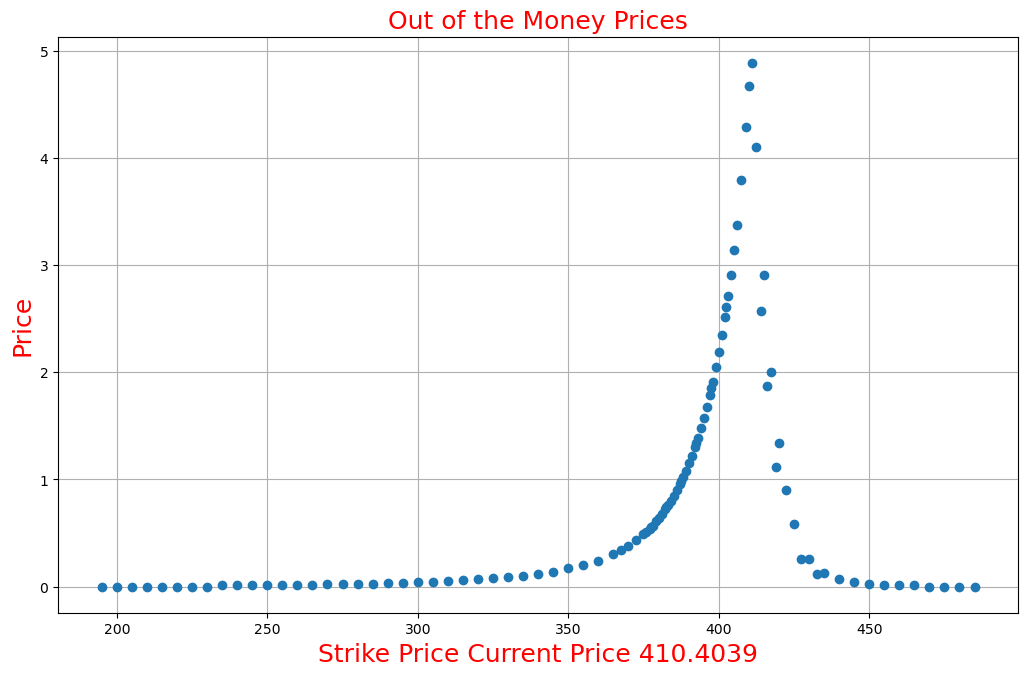

In [48]:
plt.plot(df_out_f.Strike,df_out_f.Bid,'o')
plt.subplots_adjust(left=0,bottom=0.0,right=1.5,top=1.2);
plt.title('Out of the Money Prices',color='red',fontsize=18)
plt.xlabel(f'Strike Price Current Price {df_out_f.future_val_implied.iloc[0]}',color='red',fontsize=18)
plt.ylabel('Price',color='red',fontsize=18)

plt.grid()


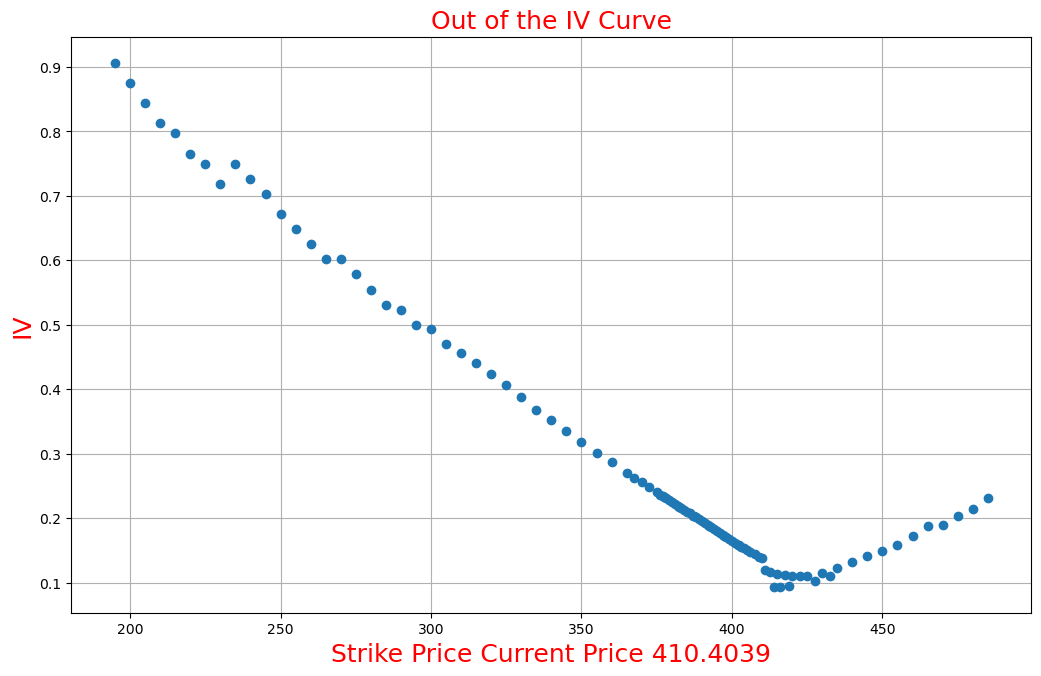

In [58]:
plt.plot(df_out_f.Strike,df_out_f['Implied Volatility'],'o')
plt.subplots_adjust(left=0,bottom=0.0,right=1.5,top=1.2);
plt.title('Out of the IV Curve',color='red',fontsize=18)
plt.xlabel(f'Strike Price Current Price {df_out_f.future_val_implied.iloc[0]}',color='red',fontsize=18)
plt.ylabel('IV',color='red',fontsize=18)

plt.grid()


# Nassim Option Pricing GUI
#### We'll have 2 GUI's<br>
<br>
Refer to Nassims paper<br>
K1 : Main option strike Price<br>
$\alpha$ : Alpha from Power laws<br>
s0 : Current Stock Price<br>
P(K1) : Price of Main Option (Only in GUI3 Calculator-  data isnt used)<br>
K2 : Strike of Other options (Only in GUI3 Calculator- Raphaels Data isnt used)<br>
P(K2) : Prices of other Options (Only in GUI3 Calculator-if Raphaels Data isnt used) <br>
Price_type : Bid  or Ask (Only in first two GUI )
<br>
Please mention CE/PE when doing so (Only out of the money options curves can be derived)
<br>
<br>
First two GUI's are on fixed data given in class, whereas in the third (A calculator) one you can input your own variables: <br><br>
1) You can put in difference $\alpha$ & Main Option Strike(K1), and see the price curves of all in comparison to current price<br>
2) In the second GUI, you can get the implied $\alpha$ from the market for various strike prices & See the minimisation curve. You can even change the Main Option Strike (K1)<br>
$\alpha$ has to be greater than 1.01<br><br>
3) Third GUI will have two parts (It is a calculator of above two GUI, above two are on fixed data, here you have freedom to give all inputs yourself) <br>
(a)  a calculator basic of nassim option prices (GUI-1 similar)<br>
 for given alpha (you can give multiple),Chosen-option-P(K1),Current stock price,strike prices, You can even input the prices of the option and it will plot the current price chart for comparison<br>
(b) a calculator basic of market implied alphas (GUI-2 Similar) <br>
for given Chosen option-P(K1),Current stock price,strike prices, Option prices(For which you want to calculate)


#### Main Functions

#### Functions for Analysis

In [195]:
class nassim_option_pricing():
    # This class has parameters like option 
    # Kindly refer to Tail Option Pricing (Nassim et al)

    
    #S0 (Assumes S0 will be in the data), or user specified
    # l (The return from where k starts could be specified or skipped)
    # It will have three functions 
    # 1. It calculates the option price given P(K1)|C(K1) or Alpha
    # 2. Function That derives the Alpha given P(K1),P(K2)|C(K1),C(K2) (The k1 prices could be skipped if l given) 
    # And gives the minimisation function

    # option type only works as call or Puts
    # If K1 is given then please give the strike price
    # Bid or ask prices which needs to be considered
    # s0 and K1 have to be numerical
    # round near if you havent specified the K1
    # OR in s0==False, then K1 and l should be specified well in advance
    ### Overall out of 3 variables (K1,l,S0) it requires any two to be specified
    
    def __init__(self,s0,option_type='CE',round_near=100):
        self.option_type = option_type

        if self.option_type=='CE':
            self.opt_ind = 1
        else:    
            self.opt_ind = -1
            
        self.s0 = s0

    #  It calculates the option price given P(K1)|C(K1), alpha, K2      
    # (It can take two parameters as an array- K2 as an array, and alpha as an array too)
    # Please give single values as list
    def relative_option_price(self,K1,P_K1,K2,alpha):
        self.K1 = np.array(K1)
        self.P_K1 = np.array(P_K1)
        self.K2 = K2
        self.alpha = alpha 
        
        if len(self.K1)>1:
            raise ValueError('For minimisation For K1 only one value in list is allowed ')

        K2_grid, alpha_grid = np.meshgrid(self.K2, self.alpha, indexing='ij')
      
        if self.opt_ind ==1:
            P_K2 = self.P_K1* ((K2_grid-self.s0)/(self.K1-self.s0))**(1-alpha_grid)             
        else:
            P_K2 = self.P_K1 * (((-K2_grid+self.s0)**(1-alpha_grid) -  ((alpha_grid-1)*K2_grid+self.s0)/self.s0**(alpha_grid))/\
                                ((-self.K1+self.s0)**(1-alpha_grid) -  ((alpha_grid-1)*self.K1+self.s0)/self.s0**(alpha_grid)))
        return P_K2

       #Function That derives the Alpha given P(K1),P(K2)|C(K1),C(K2) (The k1 prices could be skipped if l given)
        # alpha min and max and step could be given to minimise ideal is 0.1
        # While giving single values give in list please
    def relative_alpha_values(self,K1,P_K1,P_K2,K2,alpha_min=1.1,alpha_max=4.5,alpha_step=0.1,matrix_req=False):
        self.K1 = np.array(K1)
        self.P_K1 = P_K1
        self.P_K2 = np.array(P_K2)
        self.K2 = np.array(K2)

        if len(self.K1)>1:
            raise ValueError('For minimisation For K1 only one value in list is allowed ')
        # Numerical Absolute Dsitatnce minimisation to fit
        alpha = np.arange(alpha_min,alpha_max,alpha_step)
        temp_pr = self.relative_option_price(K1=self.K1,P_K1= self.P_K1,K2 =self.K2,alpha=alpha)
        min_matrix = np.abs(self.P_K2[:,None]-temp_pr)
        min_arg = np.argmin(min_matrix,axis=1)
        
        if matrix_req:
            return {
                'alpha':pd.DataFrame([K2,alpha[min_arg]],index=['strike_price','alphas']).T,
                'min_matrix':pd.DataFrame(min_matrix,index=K2,columns=np.round(alpha,2)),
                'price_matrix':pd.DataFrame(temp_pr,index=K2,columns=np.round(alpha,2))
            }
        else:
            return pd.DataFrame([K2,alpha[min_arg]],index=['strike_price','alphas']).T


In [225]:
########### GUI -1 ####### Code

l_1= widgets.Text(value='Nassim Option Pricing Formula (based on Data By Prof Raphael Douday PPP)',
                 layout=Layout(width='750px', height='30px'))
price_type_1= widgets.Dropdown(options=['Bid', 'Ask'],description = r'price_type',orientation='horizontal',value='Ask',
             style = {'description_width': 'initial'},layout=Layout(width='370px', height='30px'),continuous_update=False)
option_strike_type_1= widgets.Dropdown(options=[
    '411.0,CE','412.5,CE','414.0,CE','415.0,CE','416.0,CE','417.5,CE','419.0,CE','420.0,CE','422.5,CE','425.0,CE',
    '427.5,CE','430.0,CE','432.5,CE','435.0,CE','440.0,CE','445.0,CE','450.0,CE','455.0,CE','460.0,CE','465.0,CE',
    '470.0,CE',
    '210.0,PE','215.0,PE','220.0,PE','225.0,PE','230.0,PE','235.0,PE','240.0,PE','245.0,PE','250.0,PE','255.0,PE',
    '260.0,PE','265.0,PE','270.0,PE','275.0,PE','280.0,PE','285.0,PE','290.0,PE','295.0,PE','300.0,PE','305.0,PE',
    '310.0,PE','315.0,PE','320.0,PE','325.0,PE','330.0,PE','335.0,PE','340.0,PE','345.0,PE','350.0,PE','355.0,PE',
    '360.0,PE','365.0,PE','367.5,PE','370.0,PE','372.5,PE','375.0,PE','376.0,PE','377.0,PE','377.5,PE','378.0,PE',
    '379.0,PE','380.0,PE','381.0,PE','382.0,PE','382.5,PE','383.0,PE','384.0,PE','385.0,PE','386.0,PE','387.0,PE',
    '387.5,PE','388.0,PE','389.0,PE','390.0,PE','391.0,PE','392.0,PE','392.5,PE','393.0,PE','394.0,PE','395.0,PE',
    '396.0,PE','397.0,PE','397.5,PE','398.0,PE','399.0,PE','400.0,PE','401.0,PE','402.0,PE','402.5,PE','403.0,PE',
    '404.0,PE','405.0,PE','406.0,PE','407.5,PE','409.0,PE','410.0,PE']
    ,description = r'K1',orientation='horizontal',value='380.0,PE',
    style = {'description_width': 'initial'},layout=Layout(width='370px', height='30px'),continuous_update=False)

alpha_1= widgets.Text(value='2.5,2.8,3.5',
                    description = r'$\alpha$',orientation='horizontal',
                    style = {'description_width': 'initial'},
                     layout=Layout(width='370px', height='30px'),continuous_update=False)

ui2 = widgets.VBox([price_type_1])
ui = widgets.HBox([option_strike_type_1,alpha_1])
ui3 = widgets.HBox([ui,ui2])

def plot_1(option_strike_type,alpha,price_type,data=data):
    try:
        alpha = [float(num.strip()) for num in alpha.split(',')]
    except ValueError:
        print('$\alpha$ Enter valid numbers separated by commas')
    option_type = (option_strike_type.split(',')[1])
    K1 = float(option_strike_type.split(',')[0])

    data = data
    ### Implied from data
    P_K1 = data[(data.Strike==K1)&(data.Option_Type==option_type)][price_type].values[0]
    s0 = data.future_val_implied[0]
    if option_type=='CE':
        K2 = data[(data.Strike>=K1)&(data.Option_Type==option_type)].Strike.values
        P_K2 = data[(data.Strike>=K1)&(data.Option_Type==option_type)][price_type].values
    else:
        K2 = data[(data.Strike<=K1)&(data.Option_Type==option_type)].Strike.values
        P_K2 = data[(data.Strike<=K1)&(data.Option_Type==option_type)][price_type].values

    
    h = nassim_option_pricing(s0=s0,option_type=option_type)

    result= h.relative_option_price([K1],P_K1=[P_K1],K2 = K2,alpha=alpha)

    plt.plot(K2,P_K2)
    plt.plot(K2,result)
    name = [str(x)for x in alpha]
    name.insert(0,'original')
    plt.legend(name,loc='upper right')
    plt.grid()
    plt.subplots_adjust(left=0,bottom=0.0,right=1.5,top=1.2);
    plt.title('Option Pricing Price Fitting',color='red',fontsize=18)
    plt.xlabel('Strike Price',color='red',fontsize=18)
    plt.ylabel('Opton Price',color='red',fontsize=18)
    details = (
            f'Stock Price :{s0}\n'
        )
        
    plt.text(0.01, 0.1, details, transform=plt.gca().transAxes,
                 fontsize=12,color='red', verticalalignment='top', bbox=dict(facecolor='white', alpha=0.95))

# connect the function to make the samples and plot to the widgets    
interactive_plot_1 = widgets.interactive_output(plot_1, {'price_type':price_type_1,'alpha':alpha_1,
                                                            'option_strike_type':option_strike_type_1})
interactive_plot_1.clear_output(wait = True)               # reduce flickering by delaying plot updating  

In [356]:
option_strike_type_2= widgets.Dropdown(options=[
    '411.0,CE','412.5,CE','414.0,CE','415.0,CE','416.0,CE','417.5,CE','419.0,CE','420.0,CE','422.5,CE','425.0,CE',
    '427.5,CE','430.0,CE','432.5,CE','435.0,CE','440.0,CE','445.0,CE','450.0,CE','455.0,CE','460.0,CE','465.0,CE',
    '470.0,CE',
    '210.0,PE','215.0,PE','220.0,PE','225.0,PE','230.0,PE','235.0,PE','240.0,PE','245.0,PE','250.0,PE','255.0,PE',
    '260.0,PE','265.0,PE','270.0,PE','275.0,PE','280.0,PE','285.0,PE','290.0,PE','295.0,PE','300.0,PE','305.0,PE',
    '310.0,PE','315.0,PE','320.0,PE','325.0,PE','330.0,PE','335.0,PE','340.0,PE','345.0,PE','350.0,PE','355.0,PE',
    '360.0,PE','365.0,PE','367.5,PE','370.0,PE','372.5,PE','375.0,PE','376.0,PE','377.0,PE','377.5,PE','378.0,PE',
    '379.0,PE','380.0,PE','381.0,PE','382.0,PE','382.5,PE','383.0,PE','384.0,PE','385.0,PE','386.0,PE','387.0,PE',
    '387.5,PE','388.0,PE','389.0,PE','390.0,PE','391.0,PE','392.0,PE','392.5,PE','393.0,PE','394.0,PE','395.0,PE',
    '396.0,PE','397.0,PE','397.5,PE','398.0,PE','399.0,PE','400.0,PE','401.0,PE','402.0,PE','402.5,PE','403.0,PE',
    '404.0,PE','405.0,PE','406.0,PE','407.5,PE','409.0,PE','410.0,PE']
    ,description = r'K1',orientation='horizontal',value='380.0,PE',
    style = {'description_width': 'initial'},layout=Layout(width='370px', height='30px'),continuous_update=False)

price_type_2= widgets.Dropdown(options=['Bid', 'Ask'],description = r'price_type',orientation='horizontal',value='Ask',
             style = {'description_width': 'initial'},layout=Layout(width='370px', height='30px'),continuous_update=False)

mod_data = K2 = data[(data.Strike<=380)&(data.Option_Type=='PE')].Strike.values

chosen_min_strike= widgets.Dropdown(options=mod_data,value=mod_data[1],description = r'Strike_Min',orientation='horizontal',
                 style = {'description_width': 'initial'},layout=Layout(width='370px', height='30px'),continuous_update=False)

    




def plot_2(option_strike_type,price_type,chosen_min_strike,data=data):

    option_type = (option_strike_type.split(',')[1])
    K1 = float(option_strike_type.split(',')[0])

    data = data
    ### Implied from data
    P_K1 = data[(data.Strike==K1)&(data.Option_Type==option_type)][price_type].values[0]
    s0 = data.future_val_implied[0]
    if option_type=='CE':
        K2 = data[(data.Strike>=K1)&(data.Option_Type==option_type)].Strike.values
        P_K2 = data[(data.Strike>=K1)&(data.Option_Type==option_type)][price_type].values
    else:
        K2 = data[(data.Strike<=K1)&(data.Option_Type==option_type)].Strike.values
        P_K2 = data[(data.Strike<=K1)&(data.Option_Type==option_type)][price_type].values

    
    h = nassim_option_pricing(s0=s0,option_type=option_type)

    result_2 = h.relative_alpha_values(
            K1 = [K1],
            P_K1= [P_K1],
            K2=K2,
            P_K2 = P_K2,
            matrix_req=True
            )

    
    chosen_min_strike_pr = data[(data.Strike==chosen_min_strike)&(data.Option_Type==option_type)][price_type].values

    fig, ax = plt.subplots(2,1)
    
    ax[0].plot(result_2['alpha'].strike_price,result_2['alpha'].alphas,'-o')
    ax[0].grid()
    ax[0].set_title(r'Implied $\alpha$ Market',fontsize='18',color='red')
    ax[0].set_ylabel(r'$\alpha$',fontsize='14',color='red')
    ax[0].set_xlabel('Strike Price',fontsize='14',color='red')
    
    
    chosen_pr_matrix= np.repeat(chosen_min_strike_pr,len(result_2['price_matrix'].columns))
    ax[1].plot(result_2['price_matrix'].loc[[chosen_min_strike]].T,label='N.Formula Prices',alpha=1,color='black')
    ax[1].plot(result_2['price_matrix'].columns,
           chosen_pr_matrix,
            'o',label='Market Price')
    for (xi, yi1, yi2) in zip(result_2['price_matrix'].columns,
                              result_2['price_matrix'].loc[[chosen_min_strike]].T.values, 
                              chosen_pr_matrix):
        ax[1].plot([xi, xi], [yi1[0], yi2], 'k--')
    ax[1].legend(loc='lower left')
    ax[1].set_ylabel('Price',color='r',fontsize='14')
    ax2 = ax[1].twinx()
    ax2.plot(result_2['min_matrix'].loc[[chosen_min_strike]].T,color='red',alpha=0.5,label='Minimisation curve')
    min_val = result_2['price_matrix'].columns[np.argmin(result_2['min_matrix'].loc[[chosen_min_strike]].T)]
    ax2.scatter(result_2['price_matrix'].columns[np.argmin(result_2['min_matrix'].loc[[chosen_min_strike]].T)],
                    np.min(result_2['min_matrix'].loc[[chosen_min_strike]].T),color='red',
                label=fr'chosen $\alpha$: {min_val}')
    ax2.set_ylabel(r'$\left| \text{Market Price} - \text{N.Formula Prices)} \right|$', labelpad=20,rotation=270,
                  color='r')
    ax[1].set_title(f'Minimisation Plot - Strike Price {chosen_min_strike}',color='r',fontsize='15')
    ax[1].set_xlabel(r'$\alpha$',fontsize='14',color='red')
    ax2.legend()
    
    plt.tight_layout()
    plt.subplots_adjust(left=0,bottom=0,right=1.5,top=1.2)

def min_strike_widget(sender):
    phrase = sender['new']
    option_type = (phrase.split(',')[1])
    K1 = float(phrase.split(',')[0])
    if option_type== 'CE':
        mod_data = data[(data.Strike>=K1)&(data.Option_Type==option_type)].Strike
    else:
        mod_data =  data[(data.Strike<=K1)&(data.Option_Type==option_type)].Strike
    options=mod_data.values.tolist()
    with chosen_min_strike.hold_trait_notifications():
        chosen_min_strike.options = options
        chosen_min_strike.value=mod_data.values.tolist()[1]


option_strike_type_2.observe(min_strike_widget,names='value') ## Callback function to update the options


ui3 = widgets.VBox([price_type_2])
ui4 = widgets.HBox([option_strike_type_2,chosen_min_strike])
ui5 = widgets.HBox([ui4,ui3])

interactive_plot_2 = widgets.interactive_output(plot_2, {'price_type':price_type_2,'chosen_min_strike':chosen_min_strike,
                                                            'option_strike_type':option_strike_type_2})
interactive_plot_2.clear_output(wait = True)               # reduce flickering by delaying plot updating  

In [408]:
l_3= widgets.Text(value='Nassim Option Pricing Formula (based on Data By Prof Raphael Douday PPP)',
                 layout=Layout(width='750px', height='30px'))

option_strike_type_3= widgets.Text(options=[
    '420.0,CE']
    ,description = r'K1',orientation='horizontal',value='420.0,CE',
    style = {'description_width': 'initial'},layout=Layout(width='370px', height='30px'),continuous_update=False)


s0_3 = widgets.FloatText(value=410.4039,
                    description = r's0',orientation='horizontal',
                    style = {'description_width': 'initial'},
                     layout=Layout(width='370px', height='30px'),continuous_update=False)

P_K1_3 = widgets.FloatText(value=1.37,
                    description = r'P_K1',orientation='horizontal',
                    style = {'description_width': 'initial'},
                     layout=Layout(width='370px', height='30px'),continuous_update=False)

alpha_3= widgets.Text(value='2.5,2.9,3.5',
                    description = r'$\alpha$',orientation='horizontal',
                    style = {'description_width': 'initial'},
                     layout=Layout(width='370px', height='30px'),continuous_update=False)

K2_3 = widgets.Text(value='420:1.34,422.5:0.9,425:0.58,427.5:0.26,430:0.26,432.5:0.12,435:0.13,440:0.07,445:0.04',
                    description = r'K2:P_K2',orientation='horizontal',
                    style = {'description_width': 'initial'},
                     layout=Layout(width='970px', height='30px'),continuous_update=False)


ui6 = widgets.VBox([K2_3])
ui7 = widgets.HBox([option_strike_type_3,P_K1_3,s0_3,alpha_3])
ui8 = widgets.VBox([ui7,ui6])

def plot_3(option_strike_type,s0,P_K1,K2,alpha):
    try:
        alpha = [float(num.strip()) for num in alpha.split(',')]
    except ValueError:
        print('$\alpha$ Enter valid numbers separated by commas')
    option_type = (option_strike_type.split(',')[1])
    K1 = float(option_strike_type.split(',')[0])

    ### Implied from data
    P_K1 = float(P_K1)
    
    s0 = float(s0)

    K2_l = []
    P_K2_l = []

    elements = K2.split(',')
    for element in elements:
        before, after = element.split(':')  # Split by the colon
        K2_l.append(float(before))  # Convert to float and add to the list
        P_K2_l.append(float(after))  # Convert to float and add to the list

    K2 = K2_l
    P_K2 = P_K2_l

    
    h = nassim_option_pricing(s0=s0,option_type=option_type)

    result= h.relative_option_price([K1],P_K1=[P_K1],K2 = K2,alpha=alpha)

    plt.plot(K2,P_K2)
    plt.plot(K2,result)
    name = [str(x)for x in alpha]
    name.insert(0,'original')
    plt.legend(name,loc='upper right')
    plt.grid()
    plt.subplots_adjust(left=0,bottom=0.0,right=1.5,top=1.2);
    plt.title('Option Pricing Price Fitting',color='red',fontsize=18)
    plt.xlabel('Strike Price',color='red',fontsize=18)
    plt.ylabel('Opton Price',color='red',fontsize=18)
    details = (
            f'Stock Price :{s0}\n'
        )
        
    plt.text(0.01, 0.1, details, transform=plt.gca().transAxes,
                 fontsize=12,color='red', verticalalignment='top', bbox=dict(facecolor='white', alpha=0.95))

# connect the function to make the samples and plot to the widgets    
interactive_plot_3 = widgets.interactive_output(plot_3, {'alpha':alpha_3,
                                                        'option_strike_type':option_strike_type_3,
                                                        's0':s0_3,'P_K1':P_K1_3,'K2':K2_3})
interactive_plot_3.clear_output(wait = True)   

In [417]:
l_4= widgets.Text(value='Nassim Option Pricing Formula (based on Data By Prof Raphael Douday PPP)',
                 layout=Layout(width='750px', height='30px'))

option_strike_type_4= widgets.Text(options=[
    '420.0,CE']
    ,description = r'K1',orientation='horizontal',value='420.0,CE',
    style = {'description_width': 'initial'},layout=Layout(width='370px', height='30px'),continuous_update=False)


s0_4 = widgets.FloatText(value=410.4039,
                    description = r's0',orientation='horizontal',
                    style = {'description_width': 'initial'},
                     layout=Layout(width='370px', height='30px'),continuous_update=False)

P_K1_4 = widgets.FloatText(value=1.37,
                    description = r'P_K1',orientation='horizontal',
                    style = {'description_width': 'initial'},
                     layout=Layout(width='370px', height='30px'),continuous_update=False)

K2_4 = widgets.Text(value='420:1.34,422.5:0.9,425:0.58,427.5:0.26,430:0.26,432.5:0.12,435:0.13,440:0.07,445:0.04',
                    description = r'K2:P_K2',orientation='horizontal',
                    style = {'description_width': 'initial'},
                     layout=Layout(width='970px', height='30px'),continuous_update=False)



mod_data = []
elements = K2_4.value.split(',')
for element in elements:
    before, after = element.split(':')  
    mod_data.append(float(before))  

chosen_min_strike_1= widgets.Dropdown(options=mod_data,value=mod_data[0],description = r'Strike_Min',orientation='horizontal',
                 style = {'description_width': 'initial'},layout=Layout(width='370px', height='30px'),continuous_update=False)

    


def plot_4(option_strike_type,chosen_min_strike,s0,P_K1,K2):

    option_type = (option_strike_type.split(',')[1])
    K1 = float(option_strike_type.split(',')[0])

    chosen_min_strike=float(chosen_min_strike)
     

    ### Implied from data
    P_K1 = float(P_K1)
    
    s0 = float(s0)

    K2_l = []
    P_K2_l = []

    elements = K2.split(',')
    for element in elements:
        before, after = element.split(':')  # Split by the colon
        K2_l.append(float(before))  # Convert to float and add to the list
        P_K2_l.append(float(after))  # Convert to float and add to the list

    K2 = K2_l
    P_K2 = P_K2_l

    
    h = nassim_option_pricing(s0=s0,option_type=option_type)

    result_2 = h.relative_alpha_values(
            K1 = [K1],
            P_K1= [P_K1],
            K2=K2,
            P_K2 = P_K2,
            matrix_req=True
            )

    
    chosen_min_strike_pr = P_K1

    fig, ax = plt.subplots(2,1)
    
    ax[0].plot(result_2['alpha'].strike_price,result_2['alpha'].alphas,'-o')
    ax[0].grid()
    ax[0].set_title(r'Implied $\alpha$ Market',fontsize='18',color='red')
    ax[0].set_ylabel(r'$\alpha$',fontsize='14',color='red')
    ax[0].set_xlabel('Strike Price',fontsize='14',color='red')
    
    
    chosen_pr_matrix= np.repeat(chosen_min_strike_pr,len(result_2['price_matrix'].columns))
    ax[1].plot(result_2['price_matrix'].loc[[chosen_min_strike]].T,label='N.Formula Prices',alpha=1,color='black')
    ax[1].plot(result_2['price_matrix'].columns,
           chosen_pr_matrix,
            'o',label='Market Price')
    for (xi, yi1, yi2) in zip(result_2['price_matrix'].columns,
                              result_2['price_matrix'].loc[[chosen_min_strike]].T.values, 
                              chosen_pr_matrix):
        ax[1].plot([xi, xi], [yi1[0], yi2], 'k--')
    ax[1].legend(loc='lower left')
    ax[1].set_ylabel('Price',color='r',fontsize='14')
    ax2 = ax[1].twinx()
    ax2.plot(result_2['min_matrix'].loc[[chosen_min_strike]].T,color='red',alpha=0.5,label='Minimisation curve')
    min_val = result_2['price_matrix'].columns[np.argmin(result_2['min_matrix'].loc[[chosen_min_strike]].T)]
    ax2.scatter(result_2['price_matrix'].columns[np.argmin(result_2['min_matrix'].loc[[chosen_min_strike]].T)],
                    np.min(result_2['min_matrix'].loc[[chosen_min_strike]].T),color='red',
                label=fr'chosen $\alpha$: {min_val}')
    ax2.set_ylabel(r'$\left| \text{Market Price} - \text{N.Formula Prices)} \right|$', labelpad=20,rotation=270,
                  color='r')
    ax[1].set_title(f'Minimisation Plot - Strike Price {chosen_min_strike}',color='r',fontsize='15')
    ax[1].set_xlabel(r'$\alpha$',fontsize='14',color='red')
    ax2.legend()
    
    plt.tight_layout()
    plt.subplots_adjust(left=0,bottom=0,right=1.5,top=1.2)

def min_strike_widget(sender):
    phrase = sender['new']
    mod_data = []
    elements = K2_4.value.split(',')
    for element in elements:
        before, after = element.split(':')  # Split by the colon
        mod_data.append(float(before))  # Convert to float and add to the list
    with chosen_min_strike_1.hold_trait_notifications():
        chosen_min_strike_1.options = mod_data
        chosen_min_strike_1.value=mod_data[1]


K2_4.observe(min_strike_widget,names='value') ## Callback function to update the options


ui9 = widgets.VBox([K2_4])
ui10 = widgets.HBox([option_strike_type_4,chosen_min_strike_1,P_K1_4,s0_4])
ui11 = widgets.VBox([ui9,ui10])
    


interactive_plot_4 = widgets.interactive_output(plot_4, {'chosen_min_strike':chosen_min_strike_1,
                                                            'option_strike_type':option_strike_type_4,
                                                        's0':s0_4,'P_K1':P_K1_4,'K2':K2_4})
interactive_plot_4.clear_output(wait = True)               # reduce flickering by delaying plot updating 

# Interactive Option Formulas

### Nassim Option Formula-PPP (1)

Here you can change K1 and $\alpha$ and see the effect<br>
Both Calls and Puts can be selected from dropdown <br>
Alphas can be entered as text multiple values can be entered like '2.5,2.6,2.7,2.9...',
Then Press Enter to See the Effect <br>
Enter Values and Press enter

In [226]:
display(ui3, interactive_plot_1)   

Output(outputs=({'output_type': 'display_data', 'data': {'text/plain': '<Figure size 640x480 with 1 Axes>', 'i…

### Implied Alpha from Market (2)
Now lets assume you have chosen an alpha you can see what the market implied alpha for different strikes <br>
(Using absolute distance minimisation)<br>
For a Given K1 (Chosen Base option),<br>
1) Plot shows you Implied Alpha For different strikes
<br>
2) Lets say you want to see the minimisation curve of a strike - It shows the Minimisation curve (light red), the option price in blue color dots, Nassim option price for Different levels of $\alpha$ <br>

Change K1 and then see if the alpha is still stable upto what limit (Check minimisation curves individually to see if the minimisation is efficient or has error)

In [359]:
display(ui5, interactive_plot_2)   

Output(outputs=({'output_type': 'display_data', 'data': {'text/plain': '<Figure size 640x480 with 3 Axes>', 'i…

## Calculator<br>
### 3(a)

In this you can input your on prices from the markets & test for different values of alpha<br>
Note: While entering all inputs it may show an error keep on entering once done press shift enter(enter for text boxes)<br>
Though make sure only out of the money options are input,<br>
1) K2:P_K2 -- Strike Price: Price of the Option<br>
2) K1 is the option you want to test,relative to others, written as 420.0,CE/PE (Strike_price,Option_type)<br>
3) P_K1 is the price of the option base one<br>
4) s0 your current stock price<br>
5) Alphas can be multiple to test<br>

In [410]:
display(ui8, interactive_plot_3)   

Output(outputs=({'output_type': 'display_data', 'data': {'text/plain': '<Figure size 640x480 with 1 Axes>', 'i…

### 3(b)

In this you can input your on prices from the markets & test for implied Alpha<br>
Note: While entering all inputs it may show an error keep on entering once done press shift enter/enter (for text boxes) <br>
Though make sure only out of the money options are input,<br>
Second First Strike Price of K1 and K2 should be equal<br>
1) K2:P_K2 -- Strike Price: Price of the Option<br>
2) K1 is the option you want to test,relative to others, written as 420.0,CE/PE (Strike_price,Option_type)<br>
3) P_K1 is the price of the option base one<br>
4) s0 your current stock price<br>


In [422]:
display(ui11, interactive_plot_4)   

Output(outputs=({'output_type': 'display_data', 'data': {'text/plain': '<Figure size 640x480 with 3 Axes>', 'i…

## Comments
Senstivity - Change the values of inputs see the effects on Strike Prices, alpha, Implied Alpha<br>


Remember it is a Relative Valuation model<br>
For this relative one needs to identify from where the tails start and can price other options accordingly.<br> The beauty of the formula is that it depends only on alpha from power laws, which itself follows inverse gamma distribution, hence if you repeatedly price by it (errors will be bounded) by Bayesian approach or following a margin of safety kind approach in the limit you should reach the true value. <br>In addition it only assumes presence of first moment(which is reasonable)<br>
<br>
In the paper by nassim, there are also bounds on minimum value of alpha, i try to code it unfortunately formula was showing errors (I am sure Raphael will guide us regarding the same)


I hope this interactive clarifies and gives you some intuition regarding Nassim Option formula.
Any mistakes or Errors are mine. 
Further this is not the official version and not validated by Prof Douady if you need any kind.<br>

<br> 
<br>
<br>

Distribution of Slides for PPP is not allowed.
<br>
